# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10+',
 'ages_10-14',
 'ages_10-16',
 'ages_10-21',
 'ages_11-16',
 'ages_12+',
 'ages_12-16',
 'ages_14+',
 'ages_16+',
 'ages_1½-3',
 'ages_1½-5',
 'ages_2-5',
 'ages_4+',
 'ages_4-7',
 'ages_4-99',
 'ages_5+',
 'ages_5-12',
 'ages_5-8',
 'ages_6+',
 'ages_6-12',
 'ages_6-14',
 'ages_7+',
 'ages_7-12',
 'ages_7-14',
 'ages_8+',
 'ages_8-12',
 'ages_8-14',
 'ages_9+',
 'ages_9-12',
 'ages_9-14',
 'ages_9-16',
 'theme_name_Angry Birds™',
 'theme_name_Architecture',
 'theme_name_BOOST',
 "theme_name_Blue's Helicopter Pursuit",
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus Gyrosphere Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator 3-in-1',
 'theme_name_Creator Expert',
 'theme_name_DC Comics™ Super Heroes',
 'theme_name_DC Super Hero Girls',
 'theme_name_DIMENSIONS™',
 'theme_name_DUPLO®',
 'theme_name_Dilophosaurus Outpost Attack',
 'theme_name_Disn

In [3]:
# Your code here - Manipulate column names
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col
df.columns = [col_formatting(col) for col in df.columns]
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [4]:
# Your code here - Define the target and predictors
target = 'list_price'
x_cols = list(df.columns)
x_cols.remove(target)

In [5]:
# Your code here - Split into train and test
train, test = train_test_split(df)
print(len(train), len(test))
train.head()

8152 2718


,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
1217,0.653342,136.7924,0.187972,0.564601,0.368848,0.117830,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3592,0.689434,119.9520,3.287961,0.041796,0.368848,0.439724,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4301,0.048199,60.9878,0.355539,0.390333,0.368848,0.439724,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1818,0.476491,48.7878,-0.398512,-1.526621,-0.045687,0.439724,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4729,-0.476338,21.6000,-0.398512,0.216064,-0.045687,-0.365010,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
# Your code here - Fit the actual model
predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     559.6
Date:                Wed, 06 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:22:05   Log-Likelihood:                -40624.
No. Observations:                8152   AIC:                         8.144e+04
Df Residuals:                    8057   BIC:                         8.210e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.6818      1.883     34.353      0.000      60.991      68.373
piece_count                                         79.8240      0.893     89.382      0.000      78.073      81.575
num_reviews                                          7.7810      0.680     11.446      0.000       6.449       9.114
play_star_rating                                     4.8177      0.627      7.689      0.000       3.589       6.046
star_rating                                         -1.1607      0.713     -1.627      0.104      -2.559       0.238
val_star_rating                                     -8.1792      0.637    -12.838      0.000      -9.428      -6.930
ages_10plus                                        127.5541      6.955     18.340      0.000     113.921     141.187
ages_10_14                                         -20.2696      9.077     -2.233      0.026     -38.062      -2.477
ages_10_16                                         -14.8231      4.113     -3.604      0.000     -22.886      -6.760
ages_10_21                                          55.2125      7.773      7.103      0.000      39.975      70.450
ages_11_16                                         -28.2224      5.996     -4.707      0.000     -39.976     -16.468
ages_12plus                                         66.7739      5.724     11.666      0.000      55.554      77.994
ages_12_16                                         -58.9890      7.512     -7.853      0.000     -73.714     -44.264
ages_14plus                                         11.6948      4.256      2.748      0.006       3.351      20.038
ages_16plus                                         17.7402      6.105      2.906      0.004       5.773      29.707
ages_1half_3                                        -8.3050      2.539     -3.271      0.001     -13.283      -3.327
ages_1half_5                                        -3.3379      3.039     -1.098      0.272      -9.295       2.619
ages_2_5                                            16.5982      1.732      9.583      0.000      13.203      19.994
ages_4plus                                         -21.5470      7.225     -2.982      0.003     -35.711      -7.383
ages_4_7                                            -4.6757      3.306     -1.415      0.157     -11.155       1.804
ages_4_99                                           -0.3405      4.047     -0.084      0.933      -8.273       7.592
ages_5plus                                          -8.0930      3.241     -2.497      0.013     -14.447      -1.739
ages_5_12                                          -30.5785      3.313     -9.229      0.000     -37.074     -24.083
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [7]:
# Your code here - Remove features which do not appear to be statistically relevant
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 71
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,64.6818,1.883,34.353,0.000,60.991,68.373
piece_count,79.8240,0.893,89.382,0.000,78.073,81.575
num_reviews,7.7810,0.680,11.446,0.000,6.449,9.114
play_star_rating,4.8177,0.627,7.689,0.000,3.589,6.046
star_rating,-1.1607,0.713,-1.627,0.104,-2.559,0.238


In [8]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     751.3
Date:                Wed, 06 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:22:06   Log-Likelihood:                -40635.
No. Observations:                8152   AIC:                         8.141e+04
Df Residuals:                    8081   BIC:                         8.191e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.4727      1.622     40.358      0.000      62.293      68.653
piece_count                                         79.7898      0.870     91.665      0.000      78.084      81.496
num_reviews                                          7.7650      0.669     11.606      0.000       6.454       9.077
play_star_rating                                     4.3715      0.527      8.294      0.000       3.338       5.405
val_star_rating                                     -8.6256      0.498    -17.330      0.000      -9.601      -7.650
ages_10plus                                        121.4446      4.865     24.962      0.000     111.908     130.982
ages_10_14                                         -17.7670      9.379     -1.894      0.058     -36.153       0.619
ages_10_16                                         -11.7344      3.840     -3.056      0.002     -19.262      -4.207
ages_10_21                                          46.3333      3.398     13.635      0.000      39.672      52.995
ages_11_16                                         -24.4871      5.763     -4.249      0.000     -35.784     -13.190
ages_12plus                                         66.3925      6.222     10.671      0.000      54.196      78.589
ages_12_16                                         -55.8839      7.848     -7.121      0.000     -71.268     -40.499
ages_14plus                                         13.7235      4.810      2.853      0.004       4.294      23.153
ages_16plus                                         19.3766      6.756      2.868      0.004       6.133      32.620
ages_1half_3                                        -4.6173      4.848     -0.952      0.341     -14.120       4.885
ages_2_5                                            19.8839      4.118      4.828      0.000      11.811      27.957
ages_4plus                                         -22.8297     11.003     -2.075      0.038     -44.399      -1.261
ages_5plus                                          -7.7266      3.176     -2.433      0.015     -13.952      -1.502
ages_5_12                                          -27.0561      2.768     -9.775      0.000     -32.482     -21.630
ages_6plus                                         -20.2270      5.352     -3.779      0.000     -30.719      -9.735
ages_6_12                                          -15.4207      1.938     -7.955      0.000     -19.221     -11.621
ages_7_12                                          -14.8617      2.258     -6.581      0.000     -19.288     -10.435
ages_7_14                                          -11.1020      2.020     -5.497      0.000     -15.061      -7.143
ages_8plus                               

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [9]:
# Your code here - Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

72 63
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,65.4727,1.622,40.358,0.0,62.293,68.653
piece_count,79.7898,0.870,91.665,0.0,78.084,81.496
num_reviews,7.7650,0.669,11.606,0.0,6.454,9.077
play_star_rating,4.3715,0.527,8.294,0.0,3.338,5.405
val_star_rating,-8.6256,0.498,-17.330,0.0,-9.601,-7.650


In [10]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     847.3
Date:                Wed, 06 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:22:06   Log-Likelihood:                -40642.
No. Observations:                8152   AIC:                         8.141e+04
Df Residuals:                    8089   BIC:                         8.185e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           66.7179      1.371     48.666      0.000      64.031      69.405
piece_count                                         79.9133      0.869     91.970      0.000      78.210      81.617
num_reviews                                          7.8321      0.669     11.711      0.000       6.521       9.143
play_star_rating                                     4.3702      0.524      8.336      0.000       3.342       5.398
val_star_rating                                     -8.7059      0.497    -17.521      0.000      -9.680      -7.732
ages_10plus                                        122.3126      4.797     25.497      0.000     112.909     131.716
ages_10_16                                         -10.6227      3.749     -2.833      0.005     -17.973      -3.273
ages_10_21                                          46.3315      3.315     13.975      0.000      39.833      52.830
ages_11_16                                         -24.2900      5.717     -4.249      0.000     -35.496     -13.084
ages_12plus                                         67.2040      6.187     10.862      0.000      55.075      79.333
ages_12_16                                         -53.2613      7.722     -6.897      0.000     -68.399     -38.124
ages_14plus                                         15.5925      4.721      3.303      0.001       6.339      24.846
ages_16plus                                         20.6013      6.717      3.067      0.002       7.435      33.767
ages_2_5                                            23.2161      1.918     12.102      0.000      19.456      26.977
ages_4plus                                         -23.1917     11.006     -2.107      0.035     -44.767      -1.617
ages_5plus                                          -7.7202      3.154     -2.448      0.014     -13.903      -1.538
ages_5_12                                          -26.3736      2.658     -9.924      0.000     -31.583     -21.164
ages_6plus                                         -19.6195      5.301     -3.701      0.000     -30.010      -9.229
ages_6_12                                          -14.6792      1.777     -8.263      0.000     -18.162     -11.197
ages_7_12                                          -14.3827      2.127     -6.761      0.000     -18.553     -10.213
ages_7_14                                           -9.9090      1.836     -5.397      0.000     -13.508      -6.310
ages_8plus                                          13.3685      4.528      2.952      0.003       4.492      22.245
ages_8_12                                          -15.1368      2.741     -5.523      0.000     -20.509      -9.765
ages_8_14                                

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [11]:
# Your code here - Code a way to identify multicollinearity
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

C:\Users\Drew\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.479837979611618),
 ('num_reviews', 2.8757912204349396),
 ('play_star_rating', 1.7869881792619433),
 ('val_star_rating', 1.606781726633835),
 ('ages_10plus', 7.1529372531491555),
 ('ages_10_16', 1.159536526592961),
 ('ages_10_21', 1.0535173361814838),
 ('ages_11_16', 1.1578398418958462),
 ('ages_12plus', 6.240106509305207),
 ('ages_12_16', 1.1679058229984647),
 ('ages_14plus', 2.1744681285595204),
 ('ages_16plus', 9.424095803395302),
 ('ages_2_5', 1.189369378521307),
 ('ages_4plus', 1.197268129783389),
 ('ages_5plus', inf),
 ('ages_5_12', 3.172844657993403),
 ('ages_6plus', 2.6596129258433554),
 ('ages_6_12', 1.847251634379072),
 ('ages_7_12', 1.460349135523714),
 ('ages_7_14', 1.7392544809316175),
 ('ages_8plus', 2.5793948465455943),
 ('ages_8_12', 1.270742986042811),
 ('ages_8_14', 1.8251423026545774),
 ('ages_9plus', 1.4083573626401686),
 ('ages_9_12', 1.0189358091258838),
 ('ages_9_14', 1.83335026955057),
 ('theme_name_Architecture', 5.213305242011955),
 ('theme_n

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [12]:
# Your code here - Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

63 56


In [13]:
# Your code here - Refit model with subset features
predictors = '+'.join(x_cols)
formula = target + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     844.5
Date:                Wed, 06 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:22:10   Log-Likelihood:                -41013.
No. Observations:                8152   AIC:                         8.214e+04
Df Residuals:                    8095   BIC:                         8.254e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           67.5760      1.118     60.442      0.000      65.384      69.768
piece_count                                         80.4292      0.673    119.439      0.000      79.109      81.749
num_reviews                                          5.9350      0.650      9.131      0.000       4.661       7.209
play_star_rating                                     5.5819      0.497     11.222      0.000       4.607       6.557
val_star_rating                                    -10.5229      0.497    -21.169      0.000     -11.497      -9.548
ages_10_16                                         -15.2954      3.645     -4.196      0.000     -22.441      -8.150
ages_10_21                                          44.2334      3.405     12.990      0.000      37.558      50.909
ages_11_16                                         -30.6810      5.577     -5.501      0.000     -41.614     -19.748
ages_12_16                                         -59.2041      7.677     -7.712      0.000     -74.253     -44.155
ages_14plus                                          0.4371      3.971      0.110      0.912      -7.348       8.222
ages_2_5                                            21.8293      1.866     11.696      0.000      18.171      25.488
ages_4plus                                         -12.3063     11.462     -1.074      0.283     -34.775      10.162
ages_5_12                                          -28.6555      2.688    -10.661      0.000     -33.924     -23.387
ages_6plus                                         -21.8288      5.493     -3.974      0.000     -32.596     -11.062
ages_6_12                                          -18.3469      1.673    -10.966      0.000     -21.627     -15.067
ages_7_12                                          -17.1030      2.073     -8.250      0.000     -21.167     -13.039
ages_7_14                                          -12.7641      1.754     -7.279      0.000     -16.202      -9.326
ages_8plus                                           3.2874      4.630      0.710      0.478      -5.789      12.364
ages_8_12                                          -18.0960      2.667     -6.786      0.000     -23.323     -12.869
ages_8_14                                          -13.9854      1.864     -7.504      0.000     -17.638     -10.332
ages_9plus                                          25.3856     10.424      2.435      0.015       4.952      45.819
ages_9_12                                          -29.1398      7.133     -4.085      0.000     -43.122     -15.158
ages_9_14                                          -13.3443      2.614     -5.106      0.000     -18.468      -8.221
theme_name_BOOST                         

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

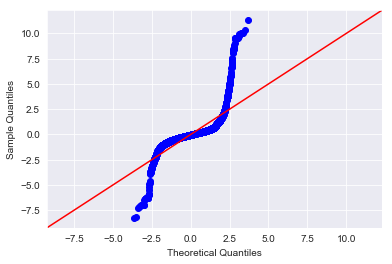

In [14]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

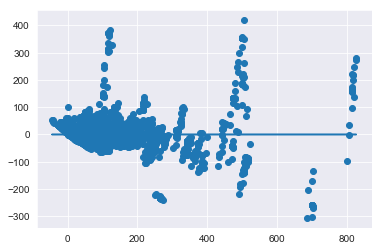

In [15]:
# Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


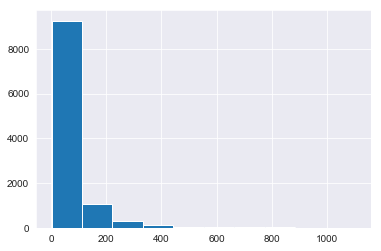

In [16]:
# Your code here - Check for outliers
df.list_price.hist()
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

In [17]:
# Your code here
# Remove extreme outliers
orig_tot = len(df)
df = df[df.list_price < 450]
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log)
train, test = train_test_split(df)

# Rerun the model
predictors = '+'.join(x_cols)
formula = target + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

Percent removed: 0.010487580496780129


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     467.2
Date:                Wed, 06 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:22:11   Log-Likelihood:                -4685.4
No. Observations:                8067   AIC:                             9485.
Df Residuals:                    8010   BIC:                             9884.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.3520      0.013    249.890      0.000       3.326       3.378
piece_count                                          0.5951      0.010     60.346      0.000       0.576       0.614
num_reviews                                          0.0190      0.008      2.325      0.020       0.003       0.035
play_star_rating                                     0.0885      0.006     14.927      0.000       0.077       0.100
val_star_rating                                     -0.1433      0.006    -24.315      0.000      -0.155      -0.132
ages_10_16                                           0.6685      0.045     14.993      0.000       0.581       0.756
ages_10_21                                           0.7665      0.039     19.829      0.000       0.691       0.842
ages_11_16                                           0.4013      0.064      6.284      0.000       0.276       0.526
ages_12_16                                           0.0605      0.083      0.731      0.465      -0.102       0.223
ages_14plus                                          0.4318      0.051      8.408      0.000       0.331       0.532
ages_2_5                                             0.5430      0.022     24.900      0.000       0.500       0.586
ages_4plus                                          -1.4542      0.122    -11.875      0.000      -1.694      -1.214
ages_5_12                                           -0.6282      0.031    -20.048      0.000      -0.690      -0.567
ages_6plus                                          -0.8556      0.066    -13.043      0.000      -0.984      -0.727
ages_6_12                                           -0.0627      0.019     -3.223      0.001      -0.101      -0.025
ages_7_12                                            0.2024      0.024      8.325      0.000       0.155       0.250
ages_7_14                                            0.1003      0.021      4.885      0.000       0.060       0.141
ages_8plus                                           0.5885      0.051     11.459      0.000       0.488       0.689
ages_8_12                                            0.3515      0.032     11.135      0.000       0.290       0.413
ages_8_14                                            0.4524      0.022     20.606      0.000       0.409       0.495
ages_9plus                                           0.2702      0.125      2.157      0.031       0.025       0.516
ages_9_12                                            0.4566      0.073      6.266      0.000       0.314       0.599
ages_9_14                                            0.6002      0.031     19.424      0.000       0.540       0.661
theme_name_BOOST                         

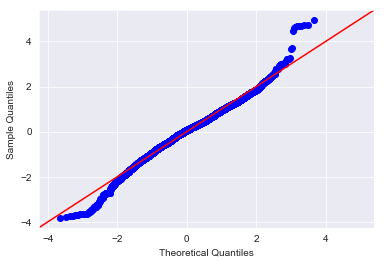

In [18]:
# Your code here - Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

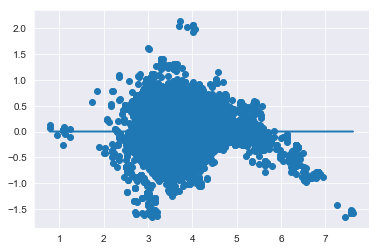

In [21]:
# Your code here - Check the Homoscedasticity Assumption
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

0.8 percentile: 4.447203233446613
0.81 percentile: 4.512971560274537
0.82 percentile: 4.542526402035123
0.83 percentile: 4.580752485605895
0.84 percentile: 4.640913706863106
0.85 percentile: 4.6985494117910225
0.86 percentile: 4.718373863481943
0.87 percentile: 4.787408405976297
0.88 percentile: 4.8039210397329235
0.89 percentile: 4.826327766567244
0.9 percentile: 4.89924031131419
0.91 percentile: 4.976713742220571
0.92 percentile: 5.0490223265009595
0.93 percentile: 5.140421850231899
0.94 percentile: 5.209419483952433
0.95 percentile: 5.292263579298989
0.96 percentile: 5.391752152536553
0.97 percentile: 5.528952783620542
0.98 percentile: 5.678340376637527
0.99 percentile: 5.873347331375852


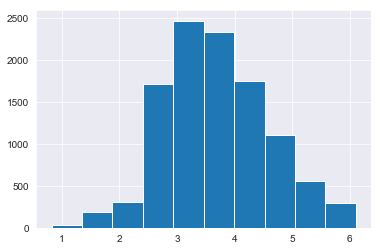

In [22]:
# Your code goes here
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

df.list_price.hist()

In [23]:
df = df[df.list_price <= 6]
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     478.3
Date:                Wed, 06 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:23:16   Log-Likelihood:                -4540.5
No. Observations:                8027   AIC:                             9195.
Df Residuals:                    7970   BIC:                             9594.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.3620      0.014    246.805      0.000       3.335       3.389
piece_count                                          0.6400      0.011     58.828      0.000       0.619       0.661
num_reviews                                          0.0227      0.008      2.777      0.005       0.007       0.039
play_star_rating                                     0.0897      0.006     15.597      0.000       0.078       0.101
val_star_rating                                     -0.1450      0.006    -24.929      0.000      -0.156      -0.134
ages_10_16                                           0.6445      0.046     14.141      0.000       0.555       0.734
ages_10_21                                           0.7807      0.039     20.130      0.000       0.705       0.857
ages_11_16                                           0.2636      0.066      4.012      0.000       0.135       0.392
ages_12_16                                          -0.1190      0.082     -1.444      0.149      -0.281       0.043
ages_14plus                                          0.3089      0.051      6.008      0.000       0.208       0.410
ages_2_5                                             0.5619      0.022     26.091      0.000       0.520       0.604
ages_4plus                                          -1.4756      0.124    -11.898      0.000      -1.719      -1.232
ages_5_12                                           -0.6722      0.031    -21.900      0.000      -0.732      -0.612
ages_6plus                                          -0.8820      0.069    -12.793      0.000      -1.017      -0.747
ages_6_12                                           -0.0782      0.019     -4.026      0.000      -0.116      -0.040
ages_7_12                                            0.1941      0.024      8.046      0.000       0.147       0.241
ages_7_14                                            0.1052      0.020      5.144      0.000       0.065       0.145
ages_8plus                                           0.5805      0.051     11.285      0.000       0.480       0.681
ages_8_12                                            0.3522      0.031     11.465      0.000       0.292       0.412
ages_8_14                                            0.4396      0.022     20.242      0.000       0.397       0.482
ages_9plus                                           0.2869      0.122      2.342      0.019       0.047       0.527
ages_9_12                                            0.4576      0.078      5.837      0.000       0.304       0.611
ages_9_14                                            0.5595      0.031     18.177      0.000       0.499       0.620
theme_name_BOOST                         

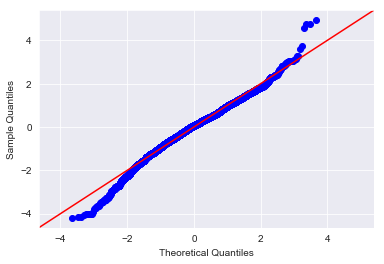

In [24]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

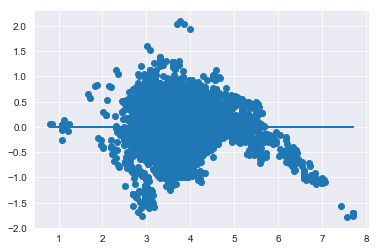

In [25]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [26]:
x_cols = ['piece_count', 'country_US']
predictors = '+'.join(x_cols)
formula = target + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     4398.
Date:                Wed, 06 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:24:13   Log-Likelihood:                -7480.4
No. Observations:                8027   AIC:                         1.497e+04
Df Residuals:                    8024   BIC:                         1.499e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7390      0.007    525.777      0.000       3.725       3.753
piece_count     0.7822      0.008     93.193      0.000       0.766       0.799
country_US     -0.2486      0.028     -8.958      0.000      -0.303      -0.194
==============================================================================
Omnibus:                      450.050   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              664.346
Skew:                          -0.492   Prob(JB):                    5.49e-145
Kurtosis:                       4.009   Cond. No.                         4.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

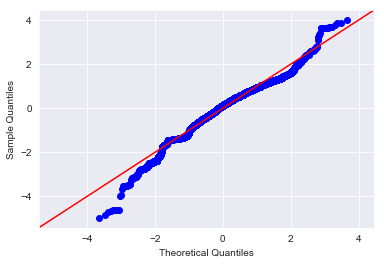

In [28]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

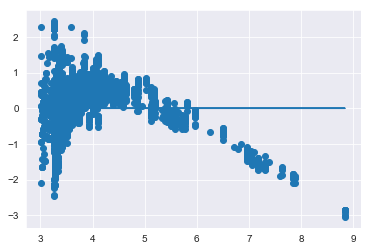

In [29]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 